In [46]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from accident_risk.data.load import load_X_y

In [47]:
X, y = load_X_y(path="../data/raw/train.csv")
data = pd.concat([X, y], axis=1)


X = X.drop(["id"], axis=1)

for colname in X.select_dtypes("object"):
    print("colname:", colname)
    X[colname], _ = X[colname].factorize()


# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

colname: road_type
colname: lighting
colname: weather
colname: time_of_day


In [48]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, n_jobs=-1)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

curvature                 0.284559
speed_limit               0.149026
lighting                  0.133193
num_reported_accidents    0.072117
weather                   0.033589
public_road               0.002938
time_of_day               0.002897
road_type                 0.002376
road_signs_present        0.001396
num_lanes                 0.001228
holiday                   0.000695
school_season             0.000000
Name: MI Scores, dtype: float64

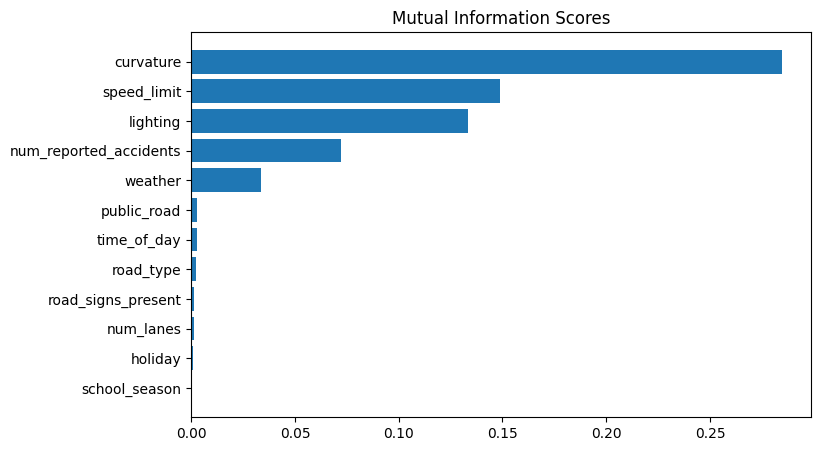

In [49]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

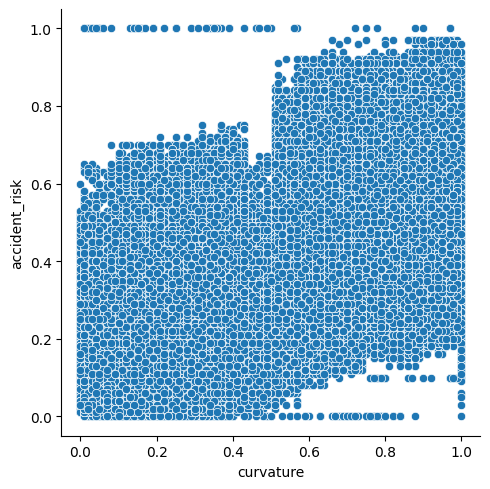

In [50]:


# it seems there are multiple sub-populations here
# we need to explore interactiions: curvature x other features
sns.relplot(data=data, x="curvature", y="accident_risk")

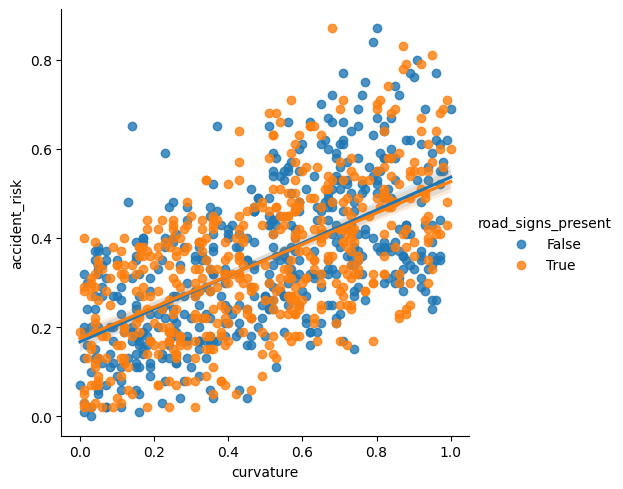

In [51]:
# road_signs_present doesn't help
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="road_signs_present")

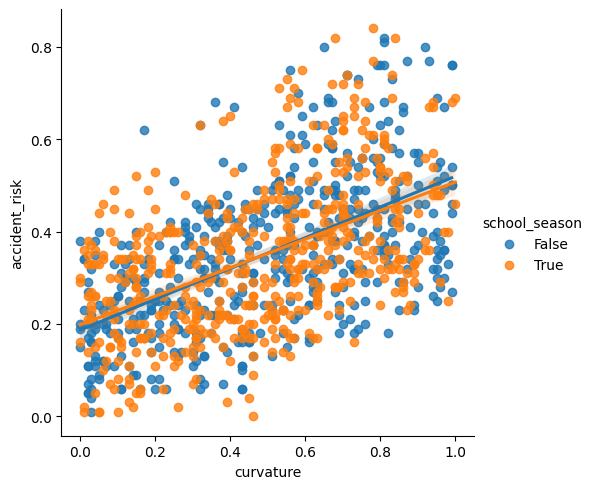

In [52]:
# school_season doesn't help
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="school_season")

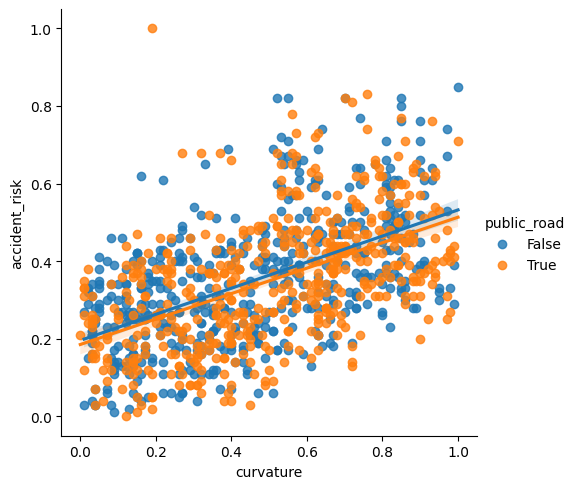

In [53]:
# public_road doesn't help
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="public_road")

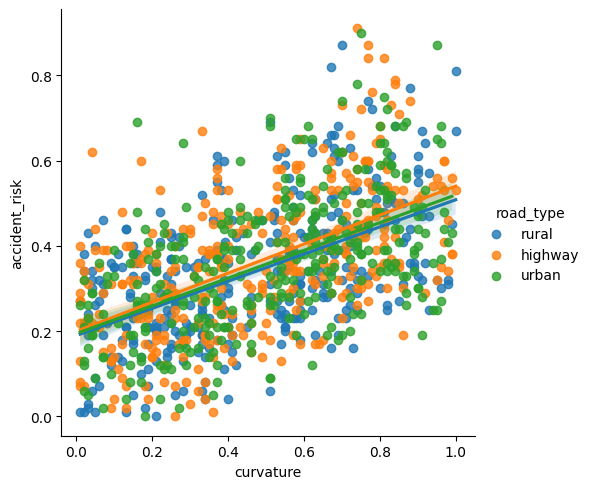

In [ ]:
# road_type doesn't help much
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="road_type")

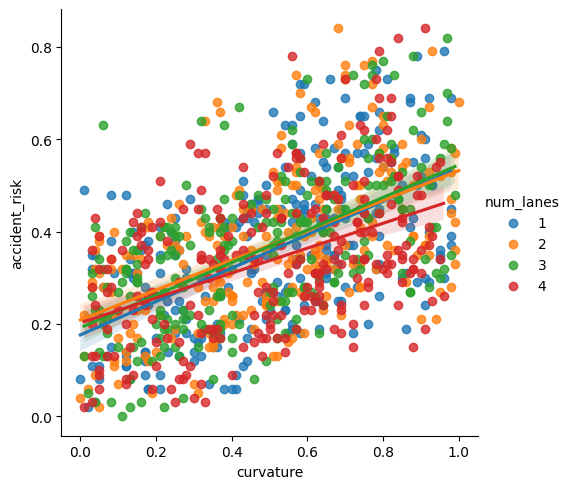

In [ ]:
# num_lanes = 4 seems to reduce risk with high curvature
# which makes logical sense
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="num_lanes")

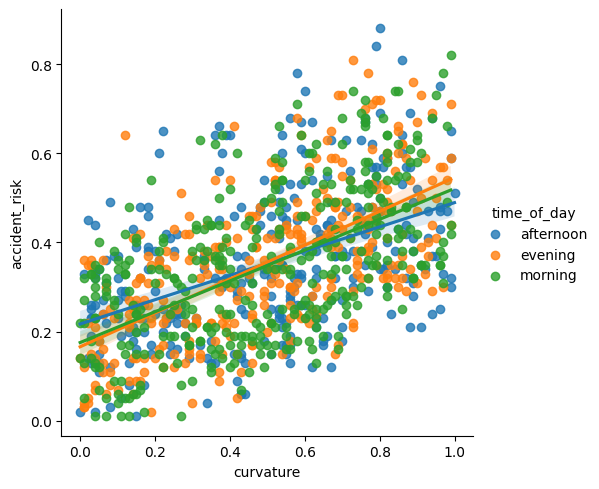

In [ ]:
# time_of_day x cuvature seems to make a small difference in risk
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="time_of_day")

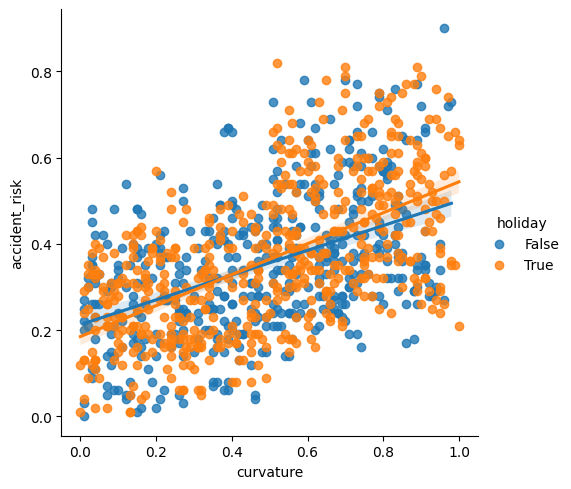

In [ ]:
# holiday has a small interaction with curvature
# holidays and high curvature lead to more risk 
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="holiday")

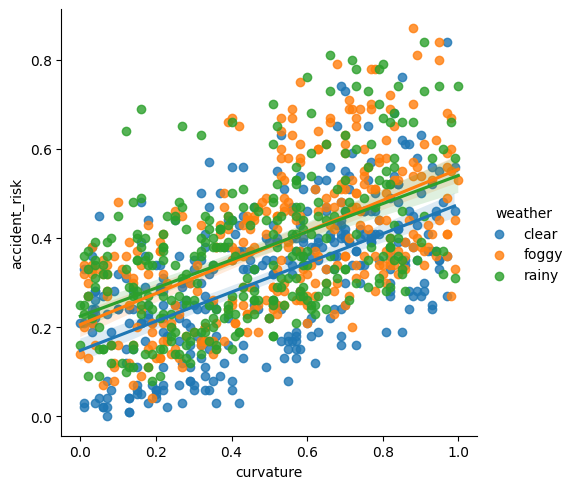

In [ ]:
# clear weather makes a significant difference in risk
# but doesn't seem to interact with curvature much
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="weather")

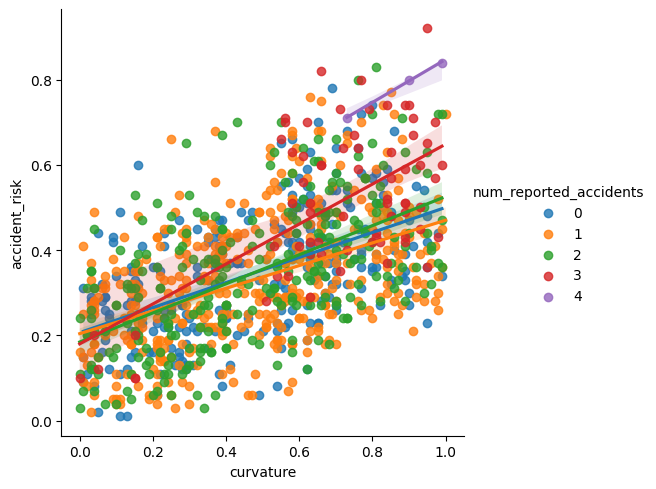

In [ ]:
# num of reported accidents >= 3 x curvature makes a big difference in risk
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="num_reported_accidents")

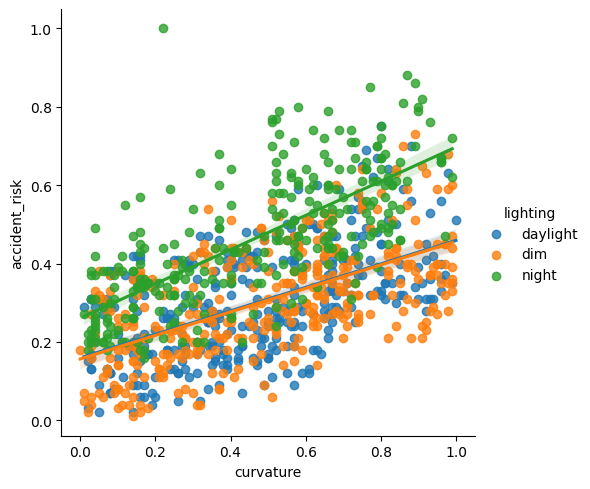

In [62]:
# lighting makes a big difference on its own
# but little interaction with curvature
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="lighting")

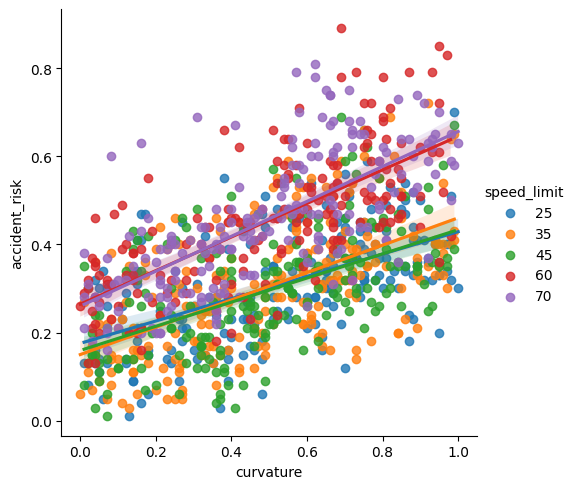

In [ ]:
# higher speed limits (60-70) x curvature increase risk
sns.lmplot(data=data.sample(1000), x="curvature", y="accident_risk", hue="speed_limit")